# Benchmarks

In this notebook, we analyse and compare performances of the *VRPy* library with other libraries, namely *ortools* and *py-ga-VRPTW*.

## Data

Computational results are summarized in csv files that are merged into a unique dataframe:

In [1]:
from pandas import read_csv, concat
from glob import glob
from numpy import float64
import matplotlib.pyplot as plt

# read csv files and merge
df = concat((read_csv(f) for f in glob("*.csv")))
df.head()

,instance,nodes,algorithm,res,best known solution,gap,time (s),vrp,time limit (s)
0,A-n32-k5.vrp,32,Clarke&Wright,975,784,24.362245,0.013963,cvrp,5
1,A-n33-k5.vrp,33,Clarke&Wright,696,661,5.295008,0.008976,cvrp,5
2,A-n33-k6.vrp,33,Clarke&Wright,794,742,7.008086,0.010970,cvrp,5
3,A-n34-k5.vrp,34,Clarke&Wright,789,778,1.413882,0.013964,cvrp,5
4,A-n36-k5.vrp,36,Clarke&Wright,823,799,3.003755,0.014960,cvrp,5


## Performances profiles

Performance profiles are a practical way to have a global overview of the algorithms' performances. On the *x* axis, we have the relative gap (%), and on the *y* axis, the percentage of data sets solved within the gap.
So for example, at the intersection with the *y* axis is the percentage of data sets solved optimally. 

At a glance, the more the curve is in the upper left corner, the better the algorithm.

In [2]:
# x values
relative_gap = [gap for gap in range(150)]
# y values
within_gap = {}
for alg in set(df["algorithm"]):
    within_gap[alg] = []
    for gap in relative_gap:
        count=0
        for line in df.itertuples():
            if line[6]!="None":
                if line[3] == alg and float64(line[6]).item() <= gap:
                    count+=1
        within_gap[alg].append(100*count/len(set(df["instance"])))

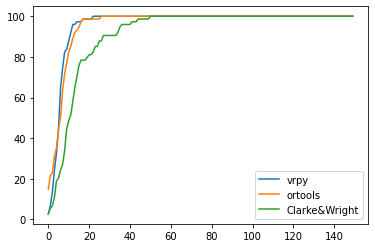

In [3]:
%matplotlib inline

fig = plt.figure()
ax = plt.subplot(111)
for alg in set(df["algorithm"]):
    ax.plot(relative_gap, within_gap[alg], label=alg)
ax.legend()
plt.show()